# <center> <u><font size = 24, color="#7B241C"> Logistic Regression Classifier  </u> 

# Up and Running with Classification

 - The first algorithm we will be using is **logistic regression**. Although, its name is regression, but it is used in **classification problems**. We have already covered a great deal of mathematics of this algorithm, so it is time to practice using it to classify data. 
 
 - We will first use logistic regression with binary classification then with multiclass classification in later lectures. 
 
### Notes about Logistic Regression 

 - You have to be aware of the following notes about logistic regression:
 
     - It is a linear classifier.
     - It produces a probability for each class, so it simulate linear regression for producing continuous values **hence the word regression**.  
     - It uses sigmoid or (logistic function) hence the word **logistic**.
     - It belongs to GLM models (Linear Model Family), that's why it's linear.
     - Using logistic function and simulating linear regression qualified it to have the name **logistic regression** and not **logistic classification**. And since it belongs to Linear model family, sklearn developers made it in the `linear_model` submodule.

## Illusttration of Linear Classifier

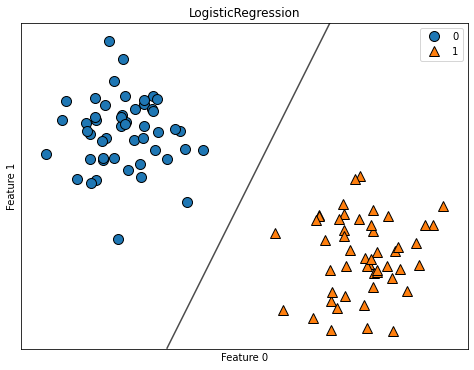

In [1]:
##=================================================================
##              Illustration of logistic Regression Classifier
##=================================================================

import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter("ignore")

X, y = mglearn.datasets.make_blobs(random_state=10123)

clf = LogisticRegression()
clf.fit(X, y)

fig, ax = plt.subplots(figsize=(8, 6))
mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                       ax=ax, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

ax.set_title("{}".format(clf.__class__.__name__)) 
ax.set_xlabel("Feature 0") 
ax.set_ylabel("Feature 1")
ax.legend()
plt.show()

## Simple Classification Example: Churn Data

In [2]:
##=================================================================
##              Importing Necessary Modules
##=================================================================

import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import glm

%matplotlib inline

In [3]:
##=================================================================
##             Reading the data
##=================================================================

churn = pd.read_csv('churn.csv')

##=================================================================
##      Building length of relationship logistic model
##=================================================================

len_relationship_mdl = glm("has_churned ~ time_since_first_purchase", data = churn,
                       family = sm.families.Binomial()).fit()
print("="*80)
print("The Length Relationship Logistic Model Results".center(80))
print("="*80, end="\n\n")
print(len_relationship_mdl.summary().tables[1])
print(end="\n\n\n")
##=================================================================
##      Building length of recency logistic model
##=================================================================
recency_model = glm("has_churned ~ time_since_last_purchase", 
                   data = churn,
                   family = sm.families.Binomial()).fit()

print("="*80)
print("The Recency Relationship Logistic Model Results".center(80))
print("="*80, end="\n\n")
print(recency_model.summary().tables[1])

                 The Length Relationship Logistic Model Results                 

                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0152      0.102     -0.150      0.881      -0.214       0.184
time_since_first_purchase    -0.3548      0.111     -3.198      0.001      -0.572      -0.137



                The Recency Relationship Logistic Model Results                 

                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.0350      0.102     -0.345      0.730      -0.234       0.164
time_since_last_purchase     0.2692      0.098      2.744      0.006       0.077       0.462


## Practice Calculating Confusion Matrix

 - In our example, there are two possible responses (churn or not churn), there are four overall outcomes.
    - **True positive**: The customer churned and the model predicted they would.
    - **False positive**: The customer didn't churn, but the model predicted they would.
    - **True negative**: The customer didn't churn and the model predicted they wouldn't.
    - **False negative**: The customer churned, but the model predicted they wouldn't.

In [4]:
# Get the actual responses
actual_response = churn['has_churned']

# Get the predicted responses
predicted_response = np.round(len_relationship_mdl.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response": actual_response,
                        "predicted_response": predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64


In [5]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Create a confusion Matrix
conf_matrix = np.reshape(outcomes.value_counts(sort=False).values, (2, 2))

# Print it
print(conf_matrix)

[[112  88]
 [ 76 124]]


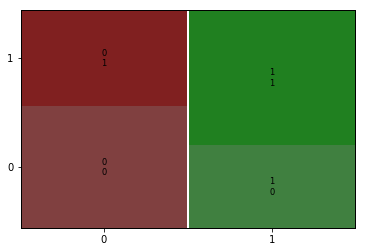

In [6]:
# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

In [7]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0, 0]
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]


# Calculate and print the accuracy
accuracy = (TN + TP)/(TN + TP + FN +FP )
print("accuracy: ", accuracy)


# Calculate and print the sensitivity
sensitivity = TP / (FN + TP)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56


## Model Perfmance Evaluation with sklearn API

In [8]:
# Import classification_report from sklearn.metrics
from sklearn.metrics import classification_report

# Import confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix

# Compute and print the confusion matrix

y = churn['has_churned']
y_pred = predicted_response
print(confusion_matrix(y, y_pred))

[[112  88]
 [ 76 124]]


In [9]:
# For more information about other metrics, use classification report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       200
           1       0.58      0.62      0.60       200

    accuracy                           0.59       400
   macro avg       0.59      0.59      0.59       400
weighted avg       0.59      0.59      0.59       400



## Practice 

- Repeat the previous steps with model of recency.